In [12]:
import os, sys
sys.path.append('../')
from core.utils.data import define_dataset, select_dist
from tqdm.notebook import tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np

In [59]:
data_dir = os.path.join('/','storage','yw18581','data')

dataset_folder = os.path.join(data_dir, 'dataset')
v2_avg_folder = os.path.join(data_dir, 'v2_avg')

In [6]:
included = select_dist(dataset_folder, dist_list=[15])

In [27]:
data_loaders, data_lengths = define_dataset(root_folder=dataset_folder,
                                           fname_key='File', alldata=True,
                                           batch_size=1, load_mask=False,
                                            include_list=included,
                                           row_slice=slice(0,1400),
                                           col_slice=slice(1000,None))

In [28]:
data_lengths

900

batch 1, corr -0.22


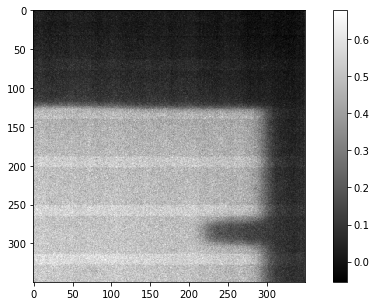

batch 2, corr -0.22


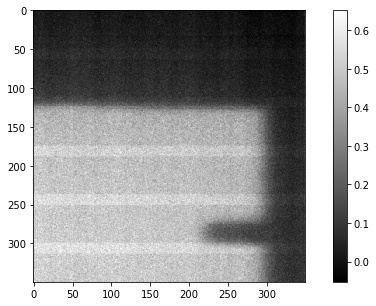

batch 1, corr -0.2


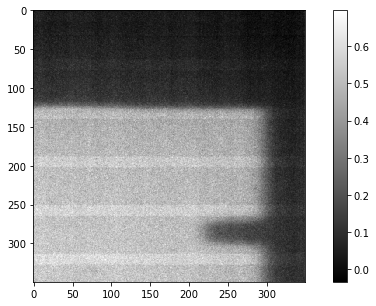

batch 2, corr -0.2


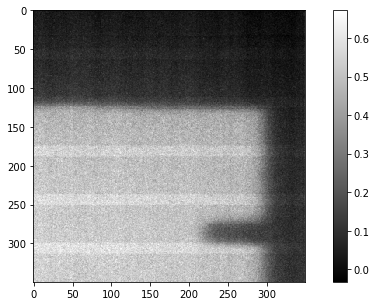

batch 1, corr -0.18000000000000002


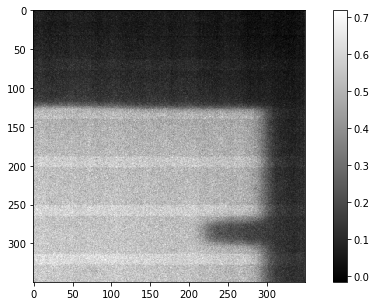

batch 2, corr -0.18000000000000002


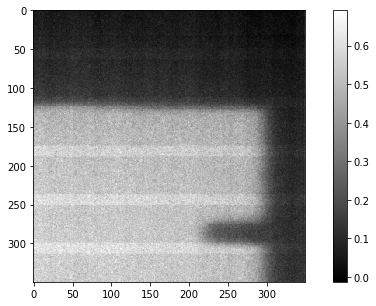

batch 1, corr -0.16000000000000003


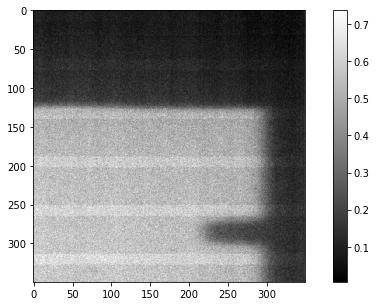

batch 2, corr -0.16000000000000003


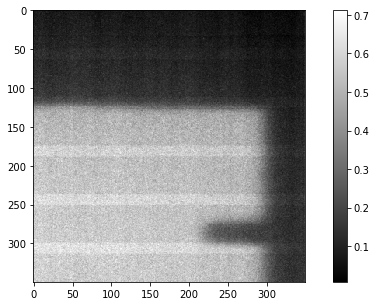

batch 1, corr -0.14000000000000004


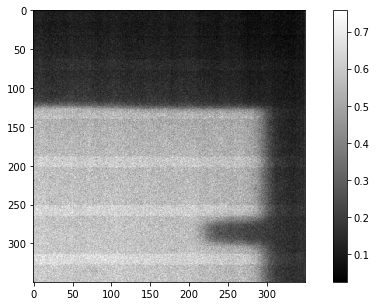

batch 2, corr -0.14000000000000004


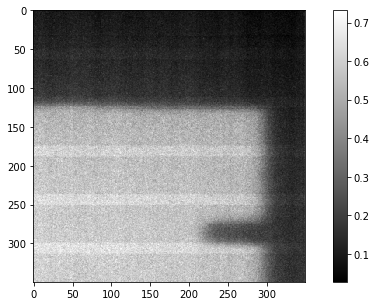

batch 1, corr -0.12000000000000005


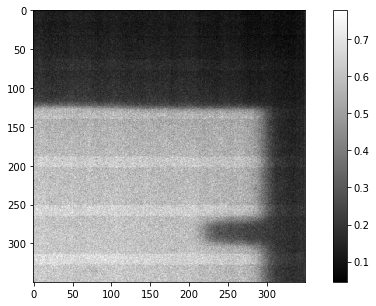

batch 2, corr -0.12000000000000005


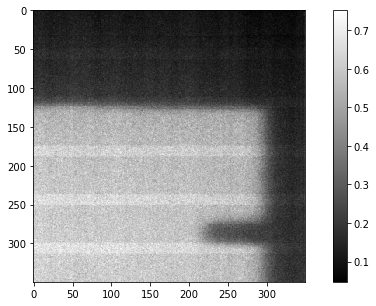

batch 1, corr -0.10000000000000006


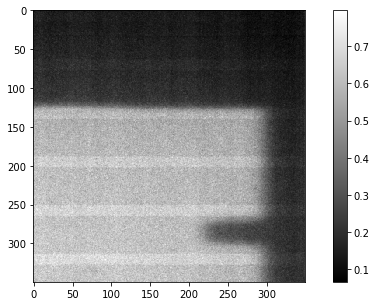

batch 2, corr -0.10000000000000006


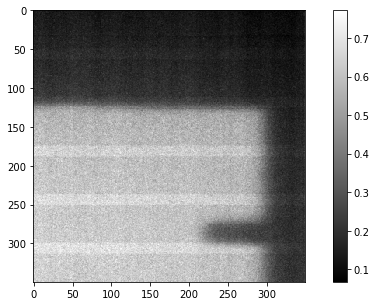

batch 1, corr -0.08000000000000007


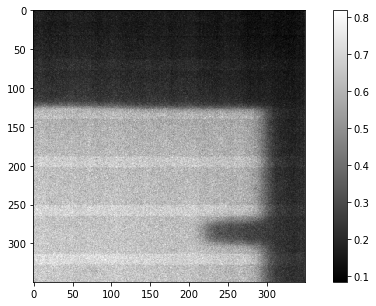

batch 2, corr -0.08000000000000007


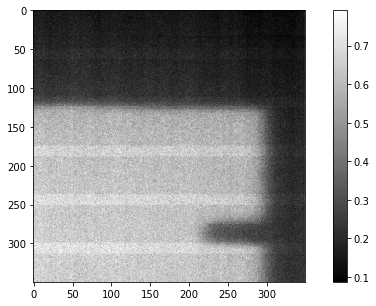

batch 1, corr -0.06000000000000008


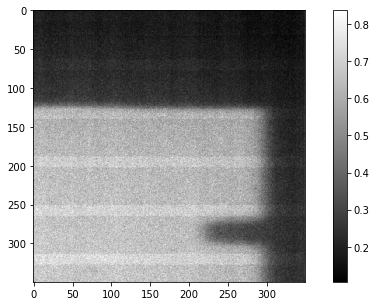

batch 2, corr -0.06000000000000008


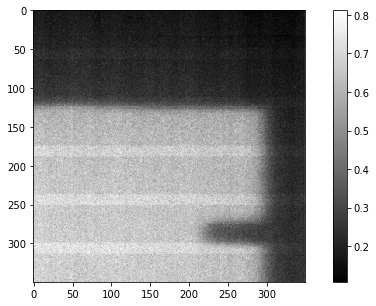

batch 1, corr -0.04000000000000009


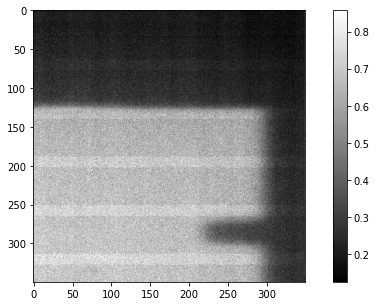

batch 2, corr -0.04000000000000009


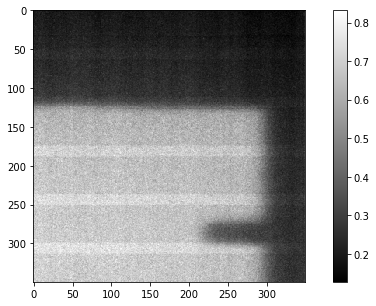

batch 1, corr -0.0200000000000001








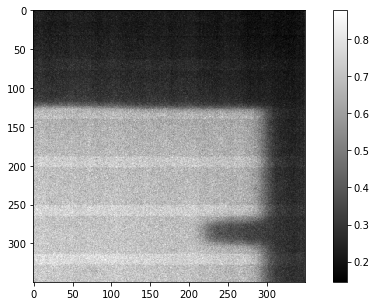

batch 2, corr -0.0200000000000001


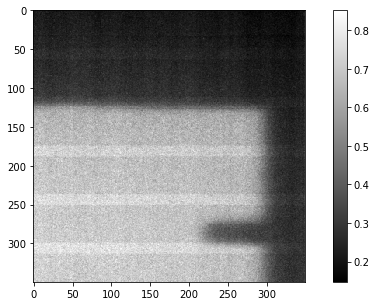

batch 1, corr -1.1102230246251565e-16


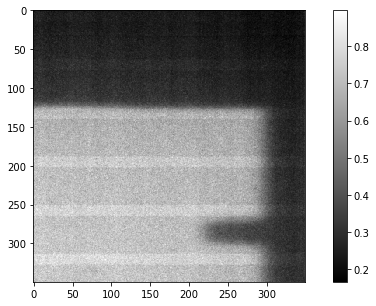

batch 2, corr -1.1102230246251565e-16


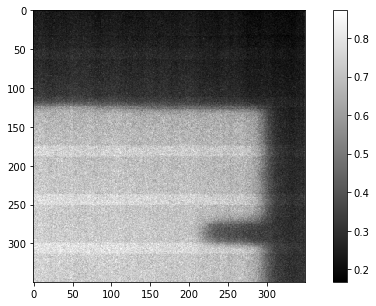

batch 1, corr 0.01999999999999988


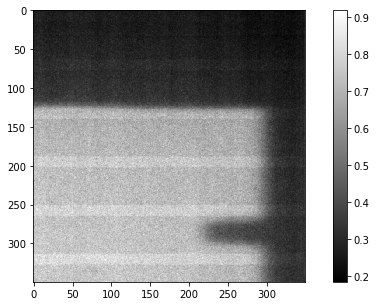

batch 2, corr 0.01999999999999988


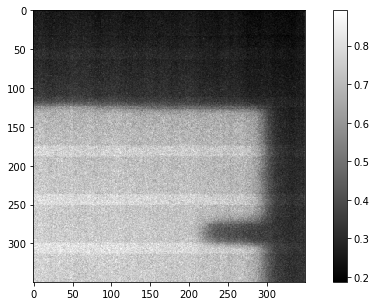

batch 1, corr 0.0399999999999999


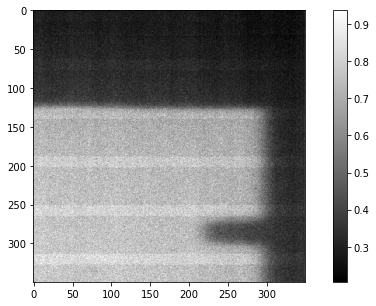

batch 2, corr 0.0399999999999999


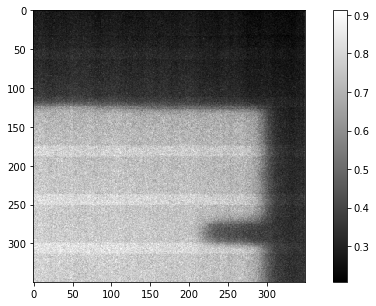

batch 1, corr 0.05999999999999986


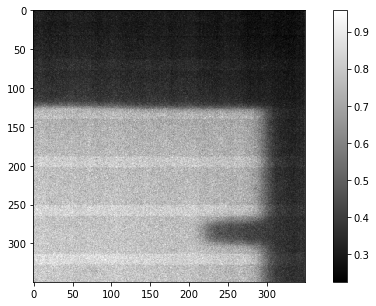

batch 2, corr 0.05999999999999986


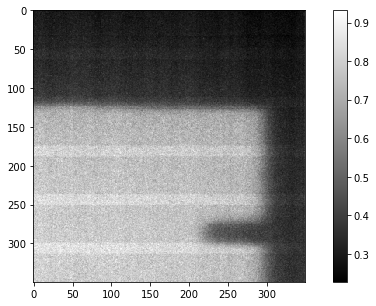

batch 1, corr 0.07999999999999982


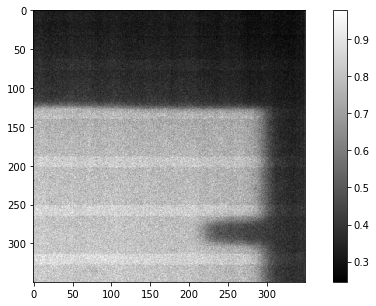

batch 2, corr 0.07999999999999982


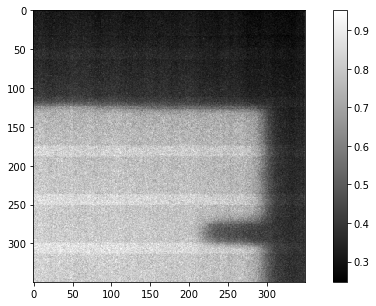

batch 1, corr 0.09999999999999984



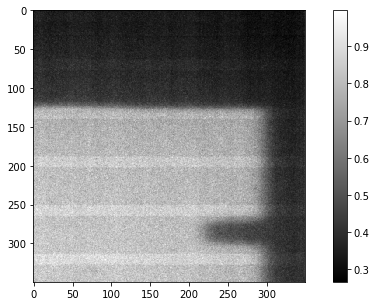

batch 2, corr 0.09999999999999984


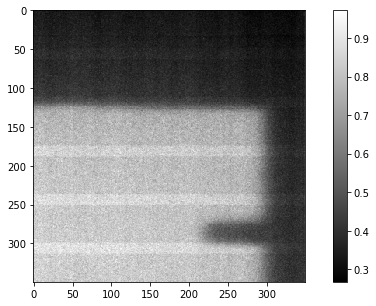

batch 1, corr 0.11999999999999986


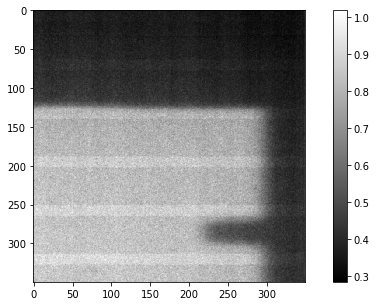

batch 2, corr 0.11999999999999986


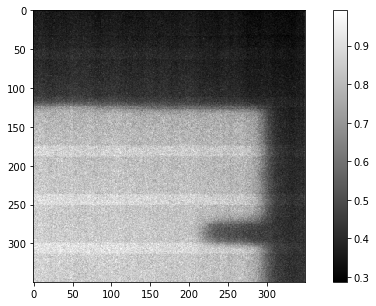

batch 1, corr 0.13999999999999982


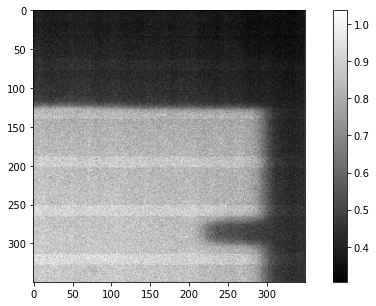

batch 2, corr 0.13999999999999982


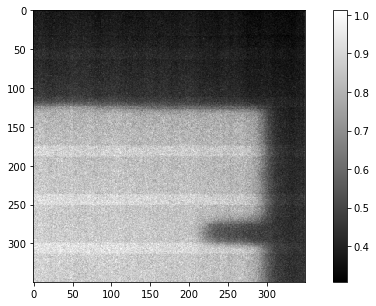

batch 1, corr 0.15999999999999978


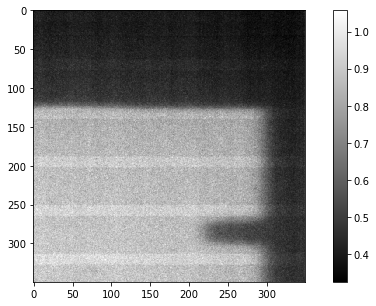

batch 2, corr 0.15999999999999978


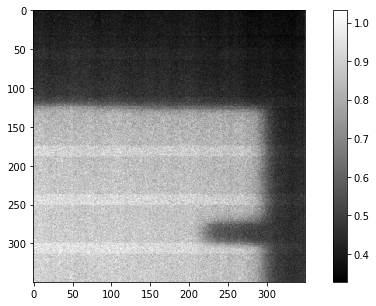

batch 1, corr 0.1799999999999998


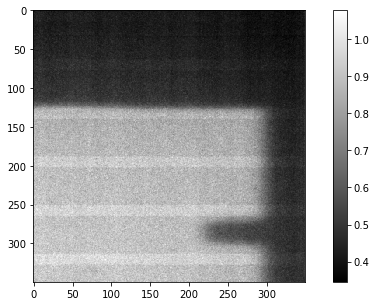

batch 2, corr 0.1799999999999998


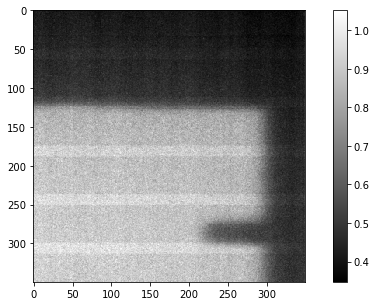

batch 1, corr 0.19999999999999982


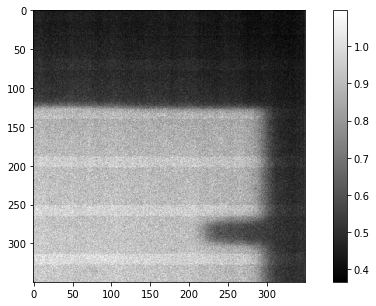

batch 2, corr 0.19999999999999982


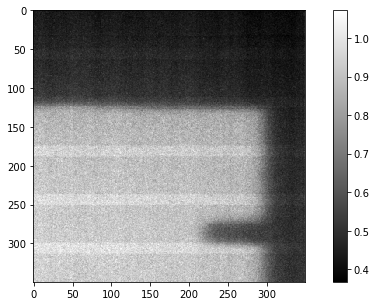

In [29]:
for corr in np.arange(-0.22, 0.22, 0.02):
    for i, batch in tqdm(enumerate(data_loaders), total=data_lengths//1, desc="Batch"):
        true_images= batch["image"]
        true_images[0]+=corr
        print("batch {}, corr {}".format(i + 1,corr))
        for j, (img) in enumerate(true_images):

            f = plt.figure(figsize=(10, 5))
            f.add_subplot(1, 1, 1)
            plt.imshow(img[0, ...], cmap='gray')
            plt.colorbar()
            plt.show(block=True)

        if i ==1:
            break

In [42]:
img_np = batch['image'].detach().numpy()[0,0,...]

In [43]:
np.min(img_np)

0.3676470588235281

In [44]:
np.max(img_np)

1.0725490196078433

In [46]:
img_np.shape

(350, 350)

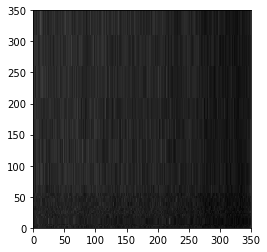

In [57]:
threshold=0.5
plt.imshow(img_np[np.where(img_np>=threshold)[0]], cmap='gray')
plt.xlim(0,350)
plt.ylim(0,350)
plt.show()

In [58]:
img_np[0]

array([0.4872549 , 0.46470588, 0.4745098 , 0.43529412, 0.47058824,
       0.45588235, 0.48235294, 0.49509804, 0.46666667, 0.45686275,
       0.47941176, 0.48627451, 0.46078431, 0.46470588, 0.46764706,
       0.48333333, 0.46568627, 0.48137255, 0.49019608, 0.43431373,
       0.45294118, 0.44313725, 0.46666667, 0.46764706, 0.46078431,
       0.45196078, 0.44313725, 0.44803922, 0.47254902, 0.45588235,
       0.43235294, 0.4627451 , 0.44509804, 0.4745098 , 0.45490196,
       0.45098039, 0.4627451 , 0.43333333, 0.43921569, 0.4245098 ,
       0.44411765, 0.43823529, 0.4745098 , 0.44117647, 0.46666667,
       0.45588235, 0.45784314, 0.45686275, 0.45294118, 0.44607843,
       0.45196078, 0.43627451, 0.49803922, 0.4745098 , 0.48627451,
       0.47254902, 0.46862745, 0.45980392, 0.44313725, 0.44803922,
       0.46470588, 0.45      , 0.46666667, 0.46078431, 0.47941176,
       0.46078431, 0.44509804, 0.45098039, 0.44901961, 0.49215686,
       0.45784314, 0.44019608, 0.45      , 0.44803922, 0.46862

In [65]:
data_loaders_v2, data_lengths_v2 = define_dataset(root_folder=os.path.join(v2_avg_folder, 'input_files'),
                                           fname_key='File', alldata=True,
                                           batch_size=1, load_mask=False,
                                           row_slice=slice(0,1400),
                                           col_slice=slice(1000,None))

In [66]:
data_lengths_v2

30

In [90]:
np.arange?

In [98]:
arr = np.arange(-0.5, 0.5, 0.02, dtype=np.float16)

In [99]:
arr

array([-5.000e-01, -4.800e-01, -4.600e-01, -4.399e-01, -4.199e-01,
       -3.999e-01, -3.799e-01, -3.599e-01, -3.398e-01, -3.198e-01,
       -2.998e-01, -2.798e-01, -2.598e-01, -2.397e-01, -2.197e-01,
       -1.997e-01, -1.797e-01, -1.597e-01, -1.396e-01, -1.196e-01,
       -9.961e-02, -7.959e-02, -5.957e-02, -3.955e-02, -1.953e-02,
        4.883e-04,  2.051e-02,  4.053e-02,  6.055e-02,  8.057e-02,
        1.006e-01,  1.206e-01,  1.406e-01,  1.606e-01,  1.807e-01,
        2.007e-01,  2.207e-01,  2.407e-01,  2.607e-01,  2.808e-01,
        3.008e-01,  3.208e-01,  3.408e-01,  3.608e-01,  3.809e-01,
        4.009e-01,  4.209e-01,  4.409e-01,  4.609e-01,  4.810e-01],
      dtype=float16)

In [101]:
np.random.choice(arr)

-0.2798

In [112]:
true_images[0][0]-0.22

tensor([[0.0604, 0.0565, 0.0594,  ..., 0.0633, 0.0584, 0.0829],
        [0.0506, 0.0594, 0.0604,  ..., 0.0545, 0.0467, 0.0722],
        [0.0525, 0.0604, 0.0584,  ..., 0.0545, 0.0457, 0.0702],
        ...,
        [0.4535, 0.4467, 0.4427,  ..., 0.1212, 0.1271, 0.1369],
        [0.4516, 0.4643, 0.4457,  ..., 0.1231, 0.1271, 0.1398],
        [0.4300, 0.4575, 0.4388,  ..., 0.1280, 0.1290, 0.1486]],
       dtype=torch.float64)

0.38980392156862353 -0.08666666666666667
batch 1, corr -0.22


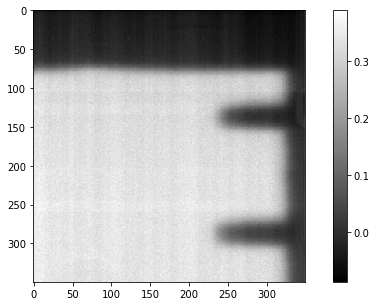

0.3898039215686272 -0.08274509803921568
batch 2, corr -0.22


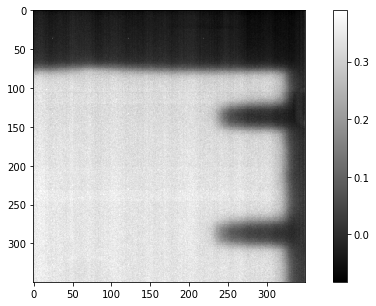

0.4098039215686235 -0.06666666666666668
batch 1, corr -0.2


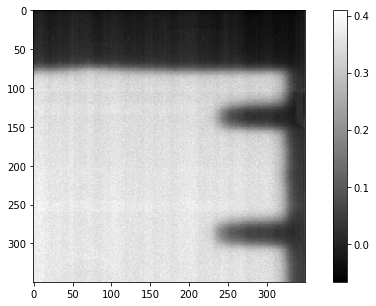

0.40980392156862716 -0.06274509803921569
batch 2, corr -0.2


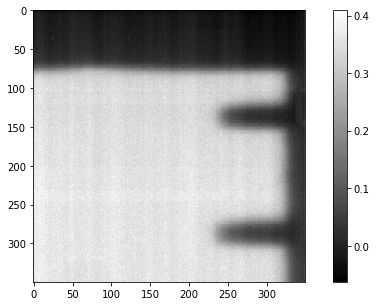

0.42980392156862346 -0.04666666666666669
batch 1, corr -0.18000000000000002


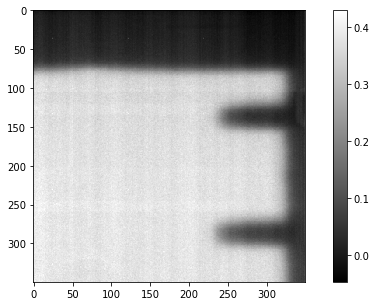

0.4298039215686271 -0.042745098039215695
batch 2, corr -0.18000000000000002


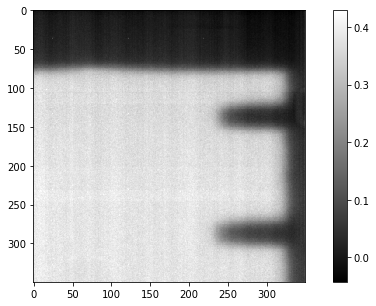

0.4498039215686235 -0.0266666666666667
batch 1, corr -0.16000000000000003


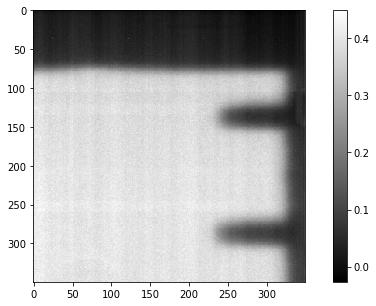

0.44980392156862714 -0.022745098039215705
batch 2, corr -0.16000000000000003


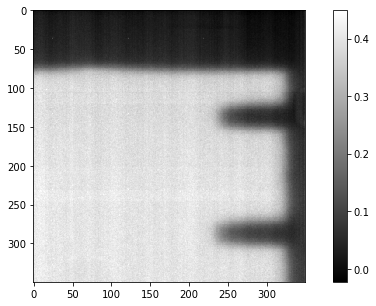

0.4698039215686235 -0.00666666666666671
batch 1, corr -0.14000000000000004


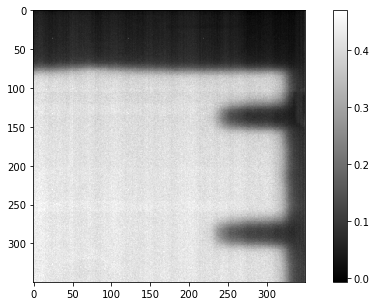

0.46980392156862716 -0.0027450980392157154
batch 2, corr -0.14000000000000004


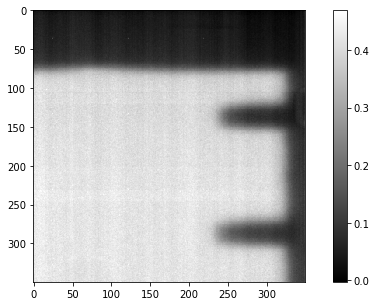

0.48980392156862346 0.01333333333333328
batch 1, corr -0.12000000000000005


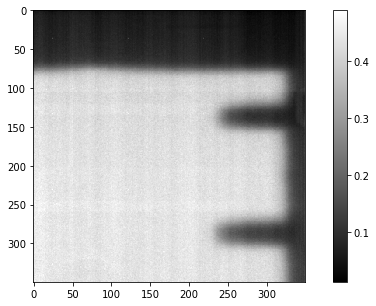

0.4898039215686271 0.017254901960784275
batch 2, corr -0.12000000000000005


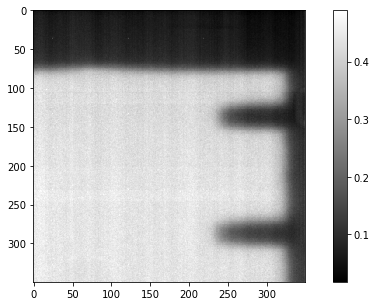

0.5098039215686234 0.03333333333333327
batch 1, corr -0.10000000000000006


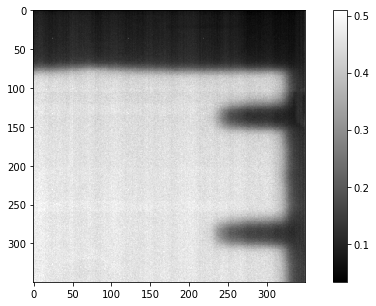

0.5098039215686271 0.037254901960784265
batch 2, corr -0.10000000000000006


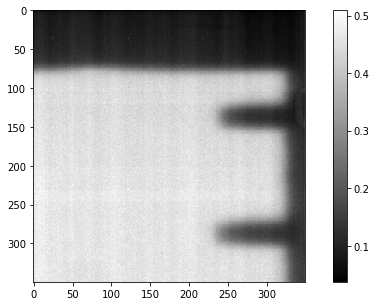

0.5298039215686234 0.05333333333333326
batch 1, corr -0.08000000000000007





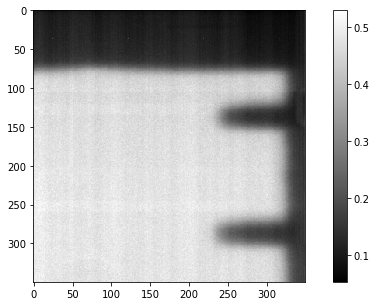

0.5298039215686271 0.057254901960784255
batch 2, corr -0.08000000000000007


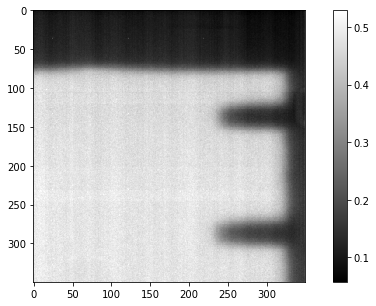

0.5498039215686235 0.07333333333333325
batch 1, corr -0.06000000000000008


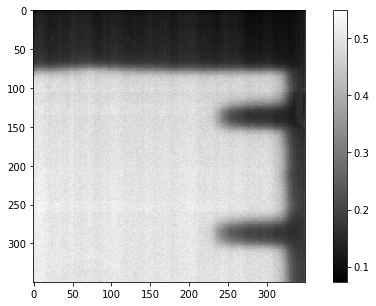

0.5498039215686271 0.07725490196078424
batch 2, corr -0.06000000000000008


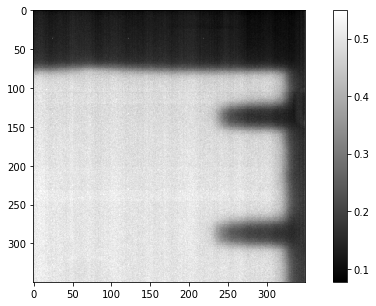

0.5698039215686235 0.09333333333333324
batch 1, corr -0.04000000000000009


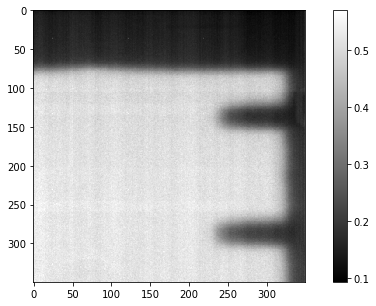

0.569803921568627 0.09725490196078423
batch 2, corr -0.04000000000000009


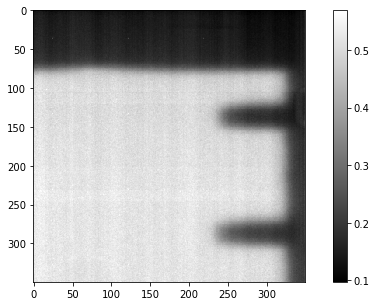

0.5898039215686234 0.11333333333333323
batch 1, corr -0.0200000000000001


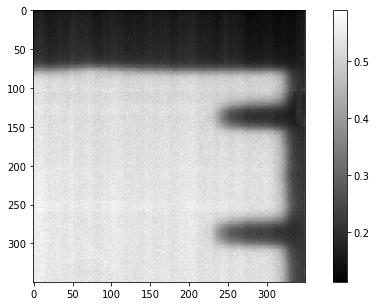

0.589803921568627 0.11725490196078422
batch 2, corr -0.0200000000000001


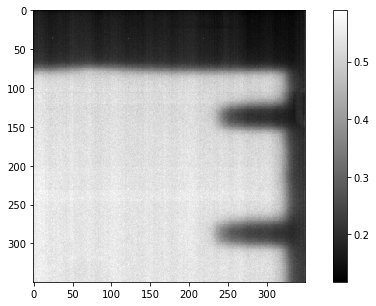

0.6098039215686234 0.13333333333333322
batch 1, corr -1.1102230246251565e-16


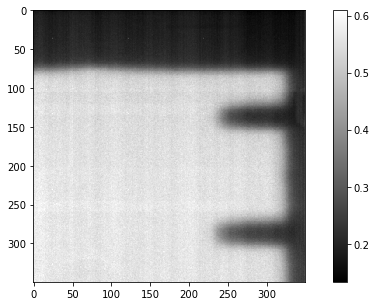

0.6098039215686271 0.13725490196078421
batch 2, corr -1.1102230246251565e-16


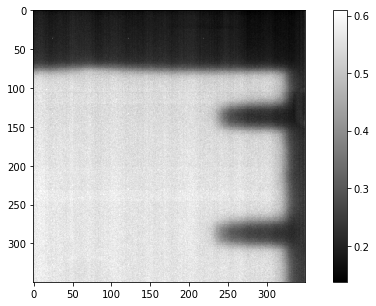

0.6298039215686234 0.1533333333333332
batch 1, corr 0.01999999999999988


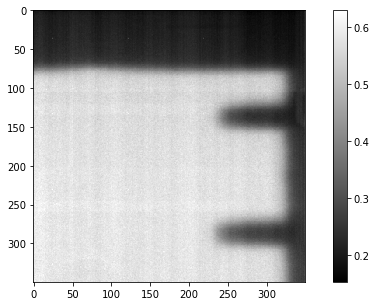

0.6298039215686271 0.1572549019607842
batch 2, corr 0.01999999999999988


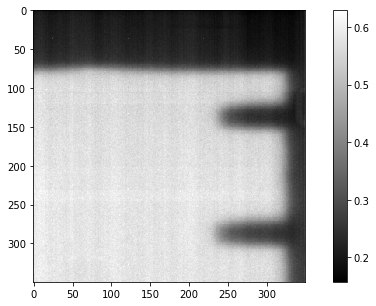

0.6498039215686234 0.17333333333333323
batch 1, corr 0.0399999999999999


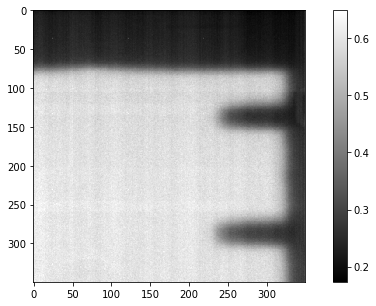

0.6498039215686271 0.17725490196078422
batch 2, corr 0.0399999999999999


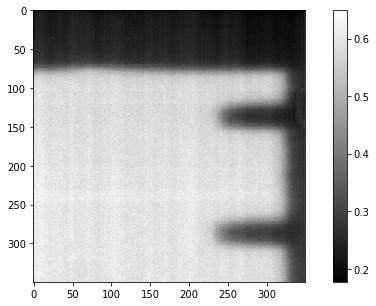

0.6698039215686233 0.1933333333333332
batch 1, corr 0.05999999999999986


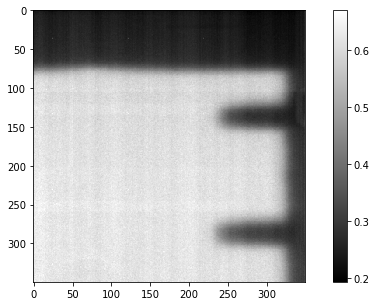

0.669803921568627 0.19725490196078418
batch 2, corr 0.05999999999999986


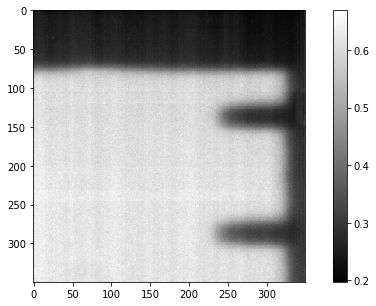

0.6898039215686234 0.21333333333333315
batch 1, corr 0.07999999999999982


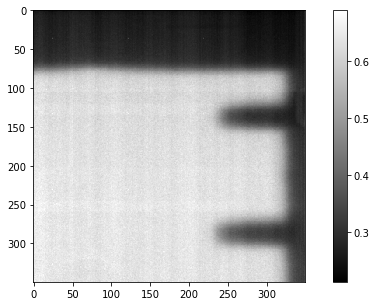

0.689803921568627 0.21725490196078415
batch 2, corr 0.07999999999999982


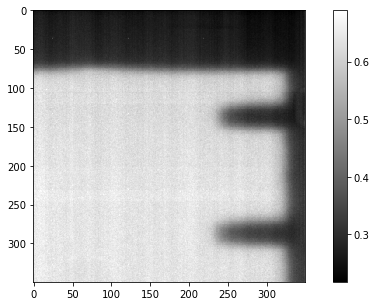

0.7098039215686234 0.23333333333333317
batch 1, corr 0.09999999999999984




KeyboardInterrupt: 

In [81]:
for corr in np.arange(-0.22, 0.22, 0.02):
    for i, batch in tqdm(enumerate(data_loaders_v2), total=data_lengths_v2//1, desc="Batch"):
        true_images= batch["image"]
        np_arr = true_images[0,0,...].detach().numpy()
        np_arr+=corr
        print(np.max(np_arr), np.min(np_arr))
        print("batch {}, corr {}".format(i + 1,corr))
        for j, (img) in enumerate(true_images):

            f = plt.figure(figsize=(10, 5))
            f.add_subplot(1, 1, 1)
            plt.imshow(img[0, ...], cmap='gray')
            plt.colorbar()
            plt.show(block=True)

        if i ==1:
            break